In [7]:
!nvidia-smi

Wed May 21 17:11:32 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [8]:
!pip install ultralytics

In [9]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.141 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.8/112.6 GB disk)


In [10]:
from ultralytics import YOLO
from IPython.display import Image

In [11]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="YB0jaMyqUG4oetwnxRoC")
project = rf.workspace("mansi-46wzf").project("spit-detection-nlkqi-snegl")
version = project.version(2)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...


In [12]:
dataset.location

'/content/spit-detection-2'

In [15]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=100 imgsz=640

Ultralytics 8.3.141 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/spit-detection-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, p

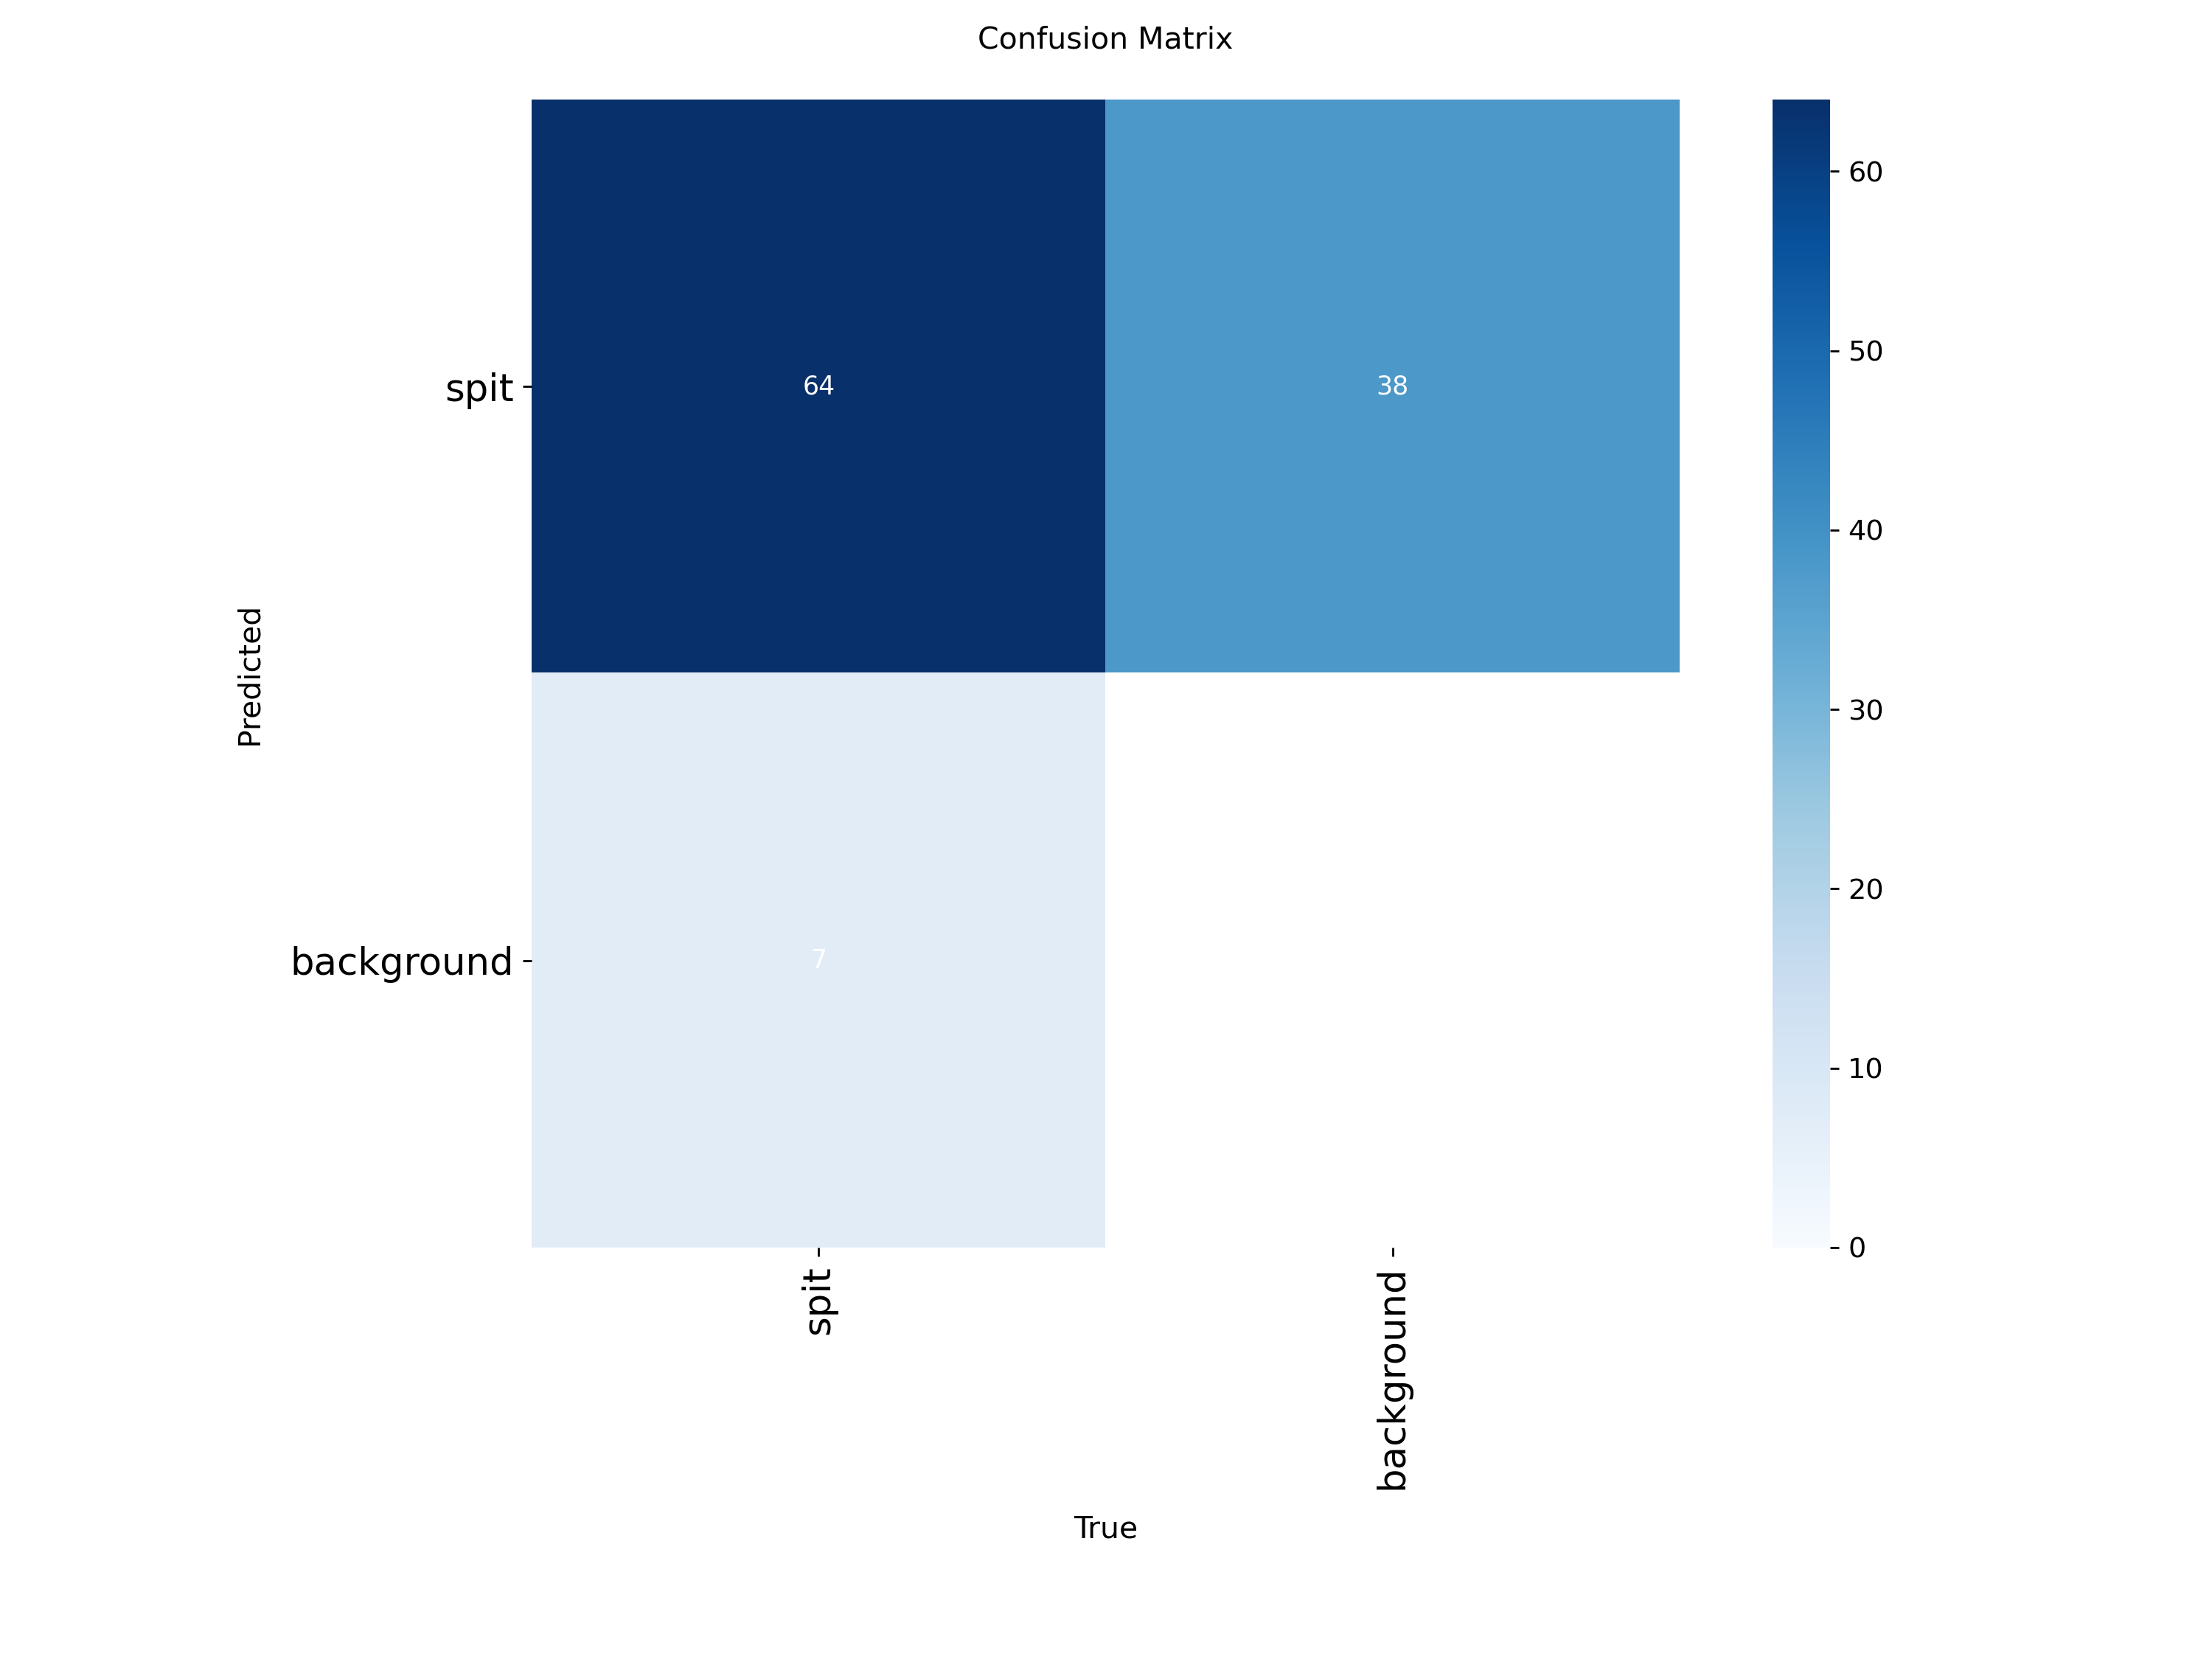

In [16]:
Image("/content/runs/detect/train3/confusion_matrix.png", width=600)

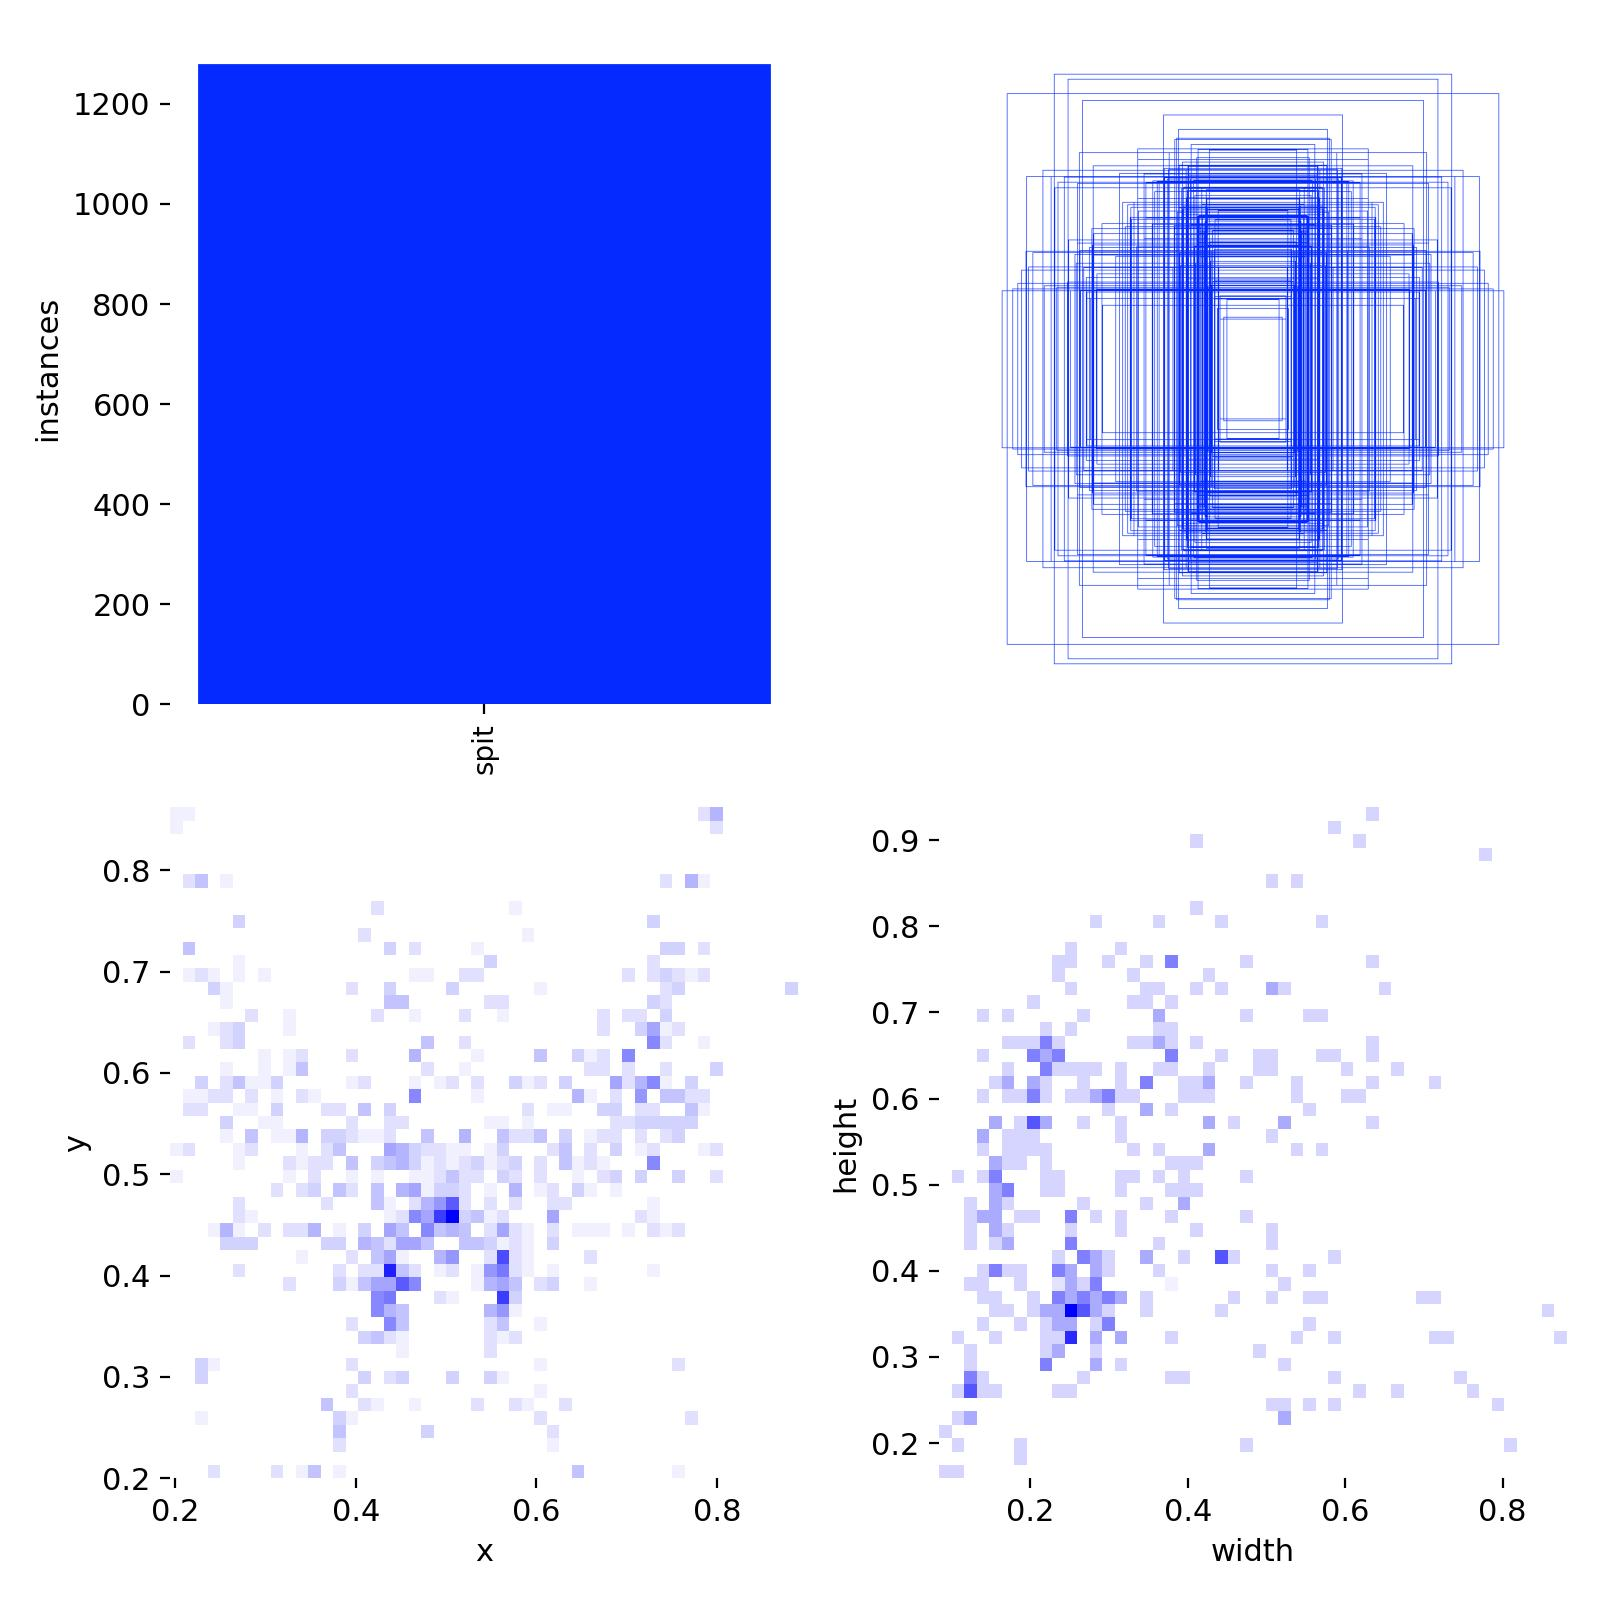

In [17]:
Image("/content/runs/detect/train3/labels.jpg", width=600)

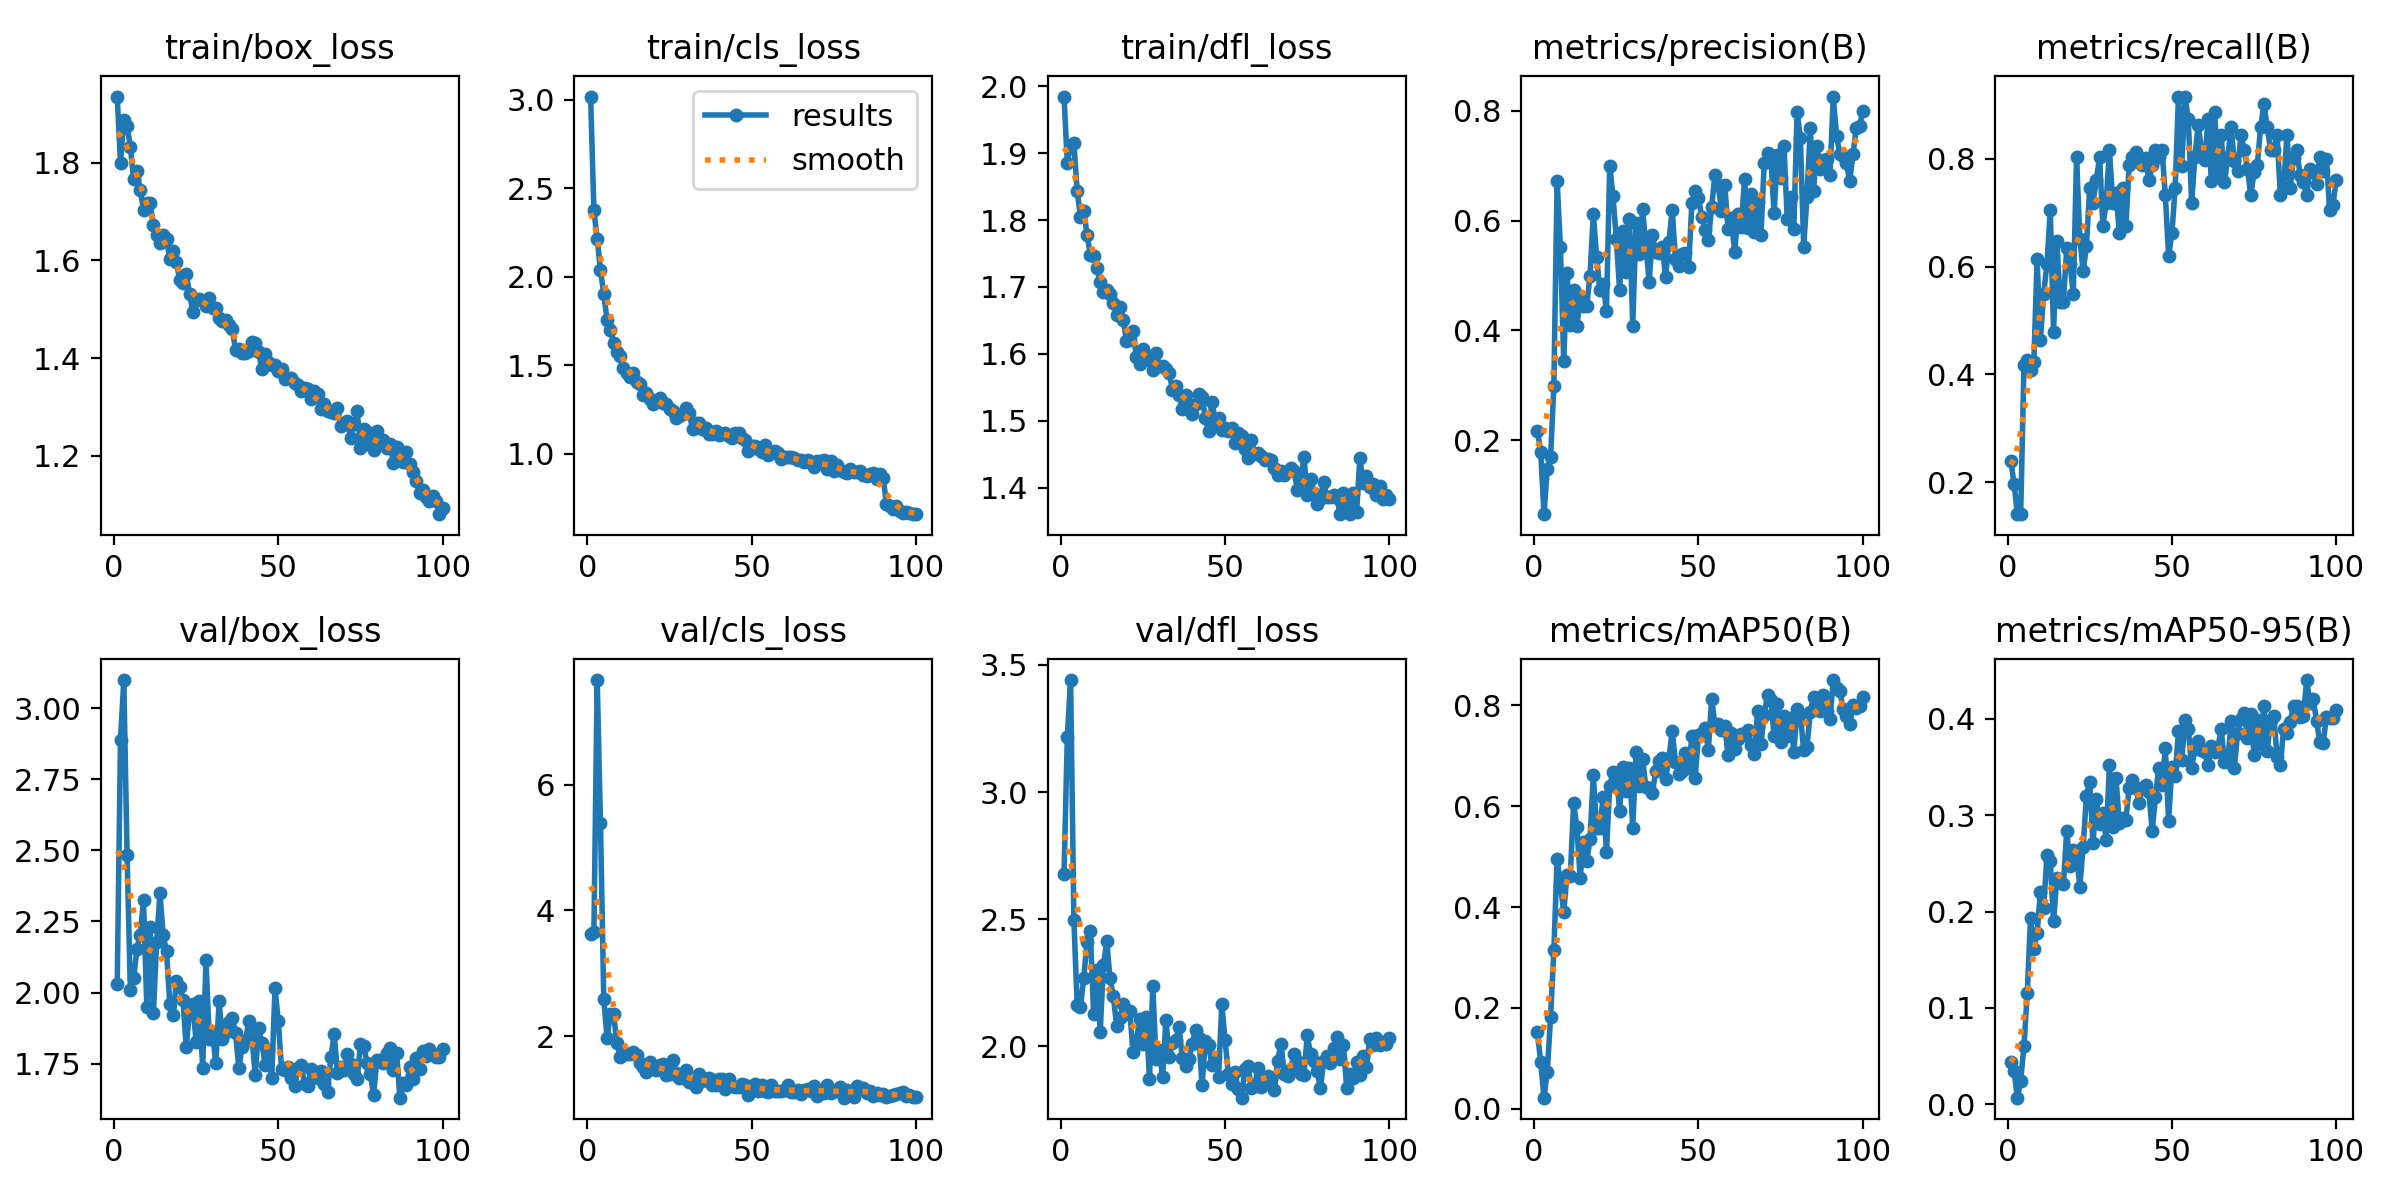

In [18]:
Image("/content/runs/detect/train3/results.png", width=600)

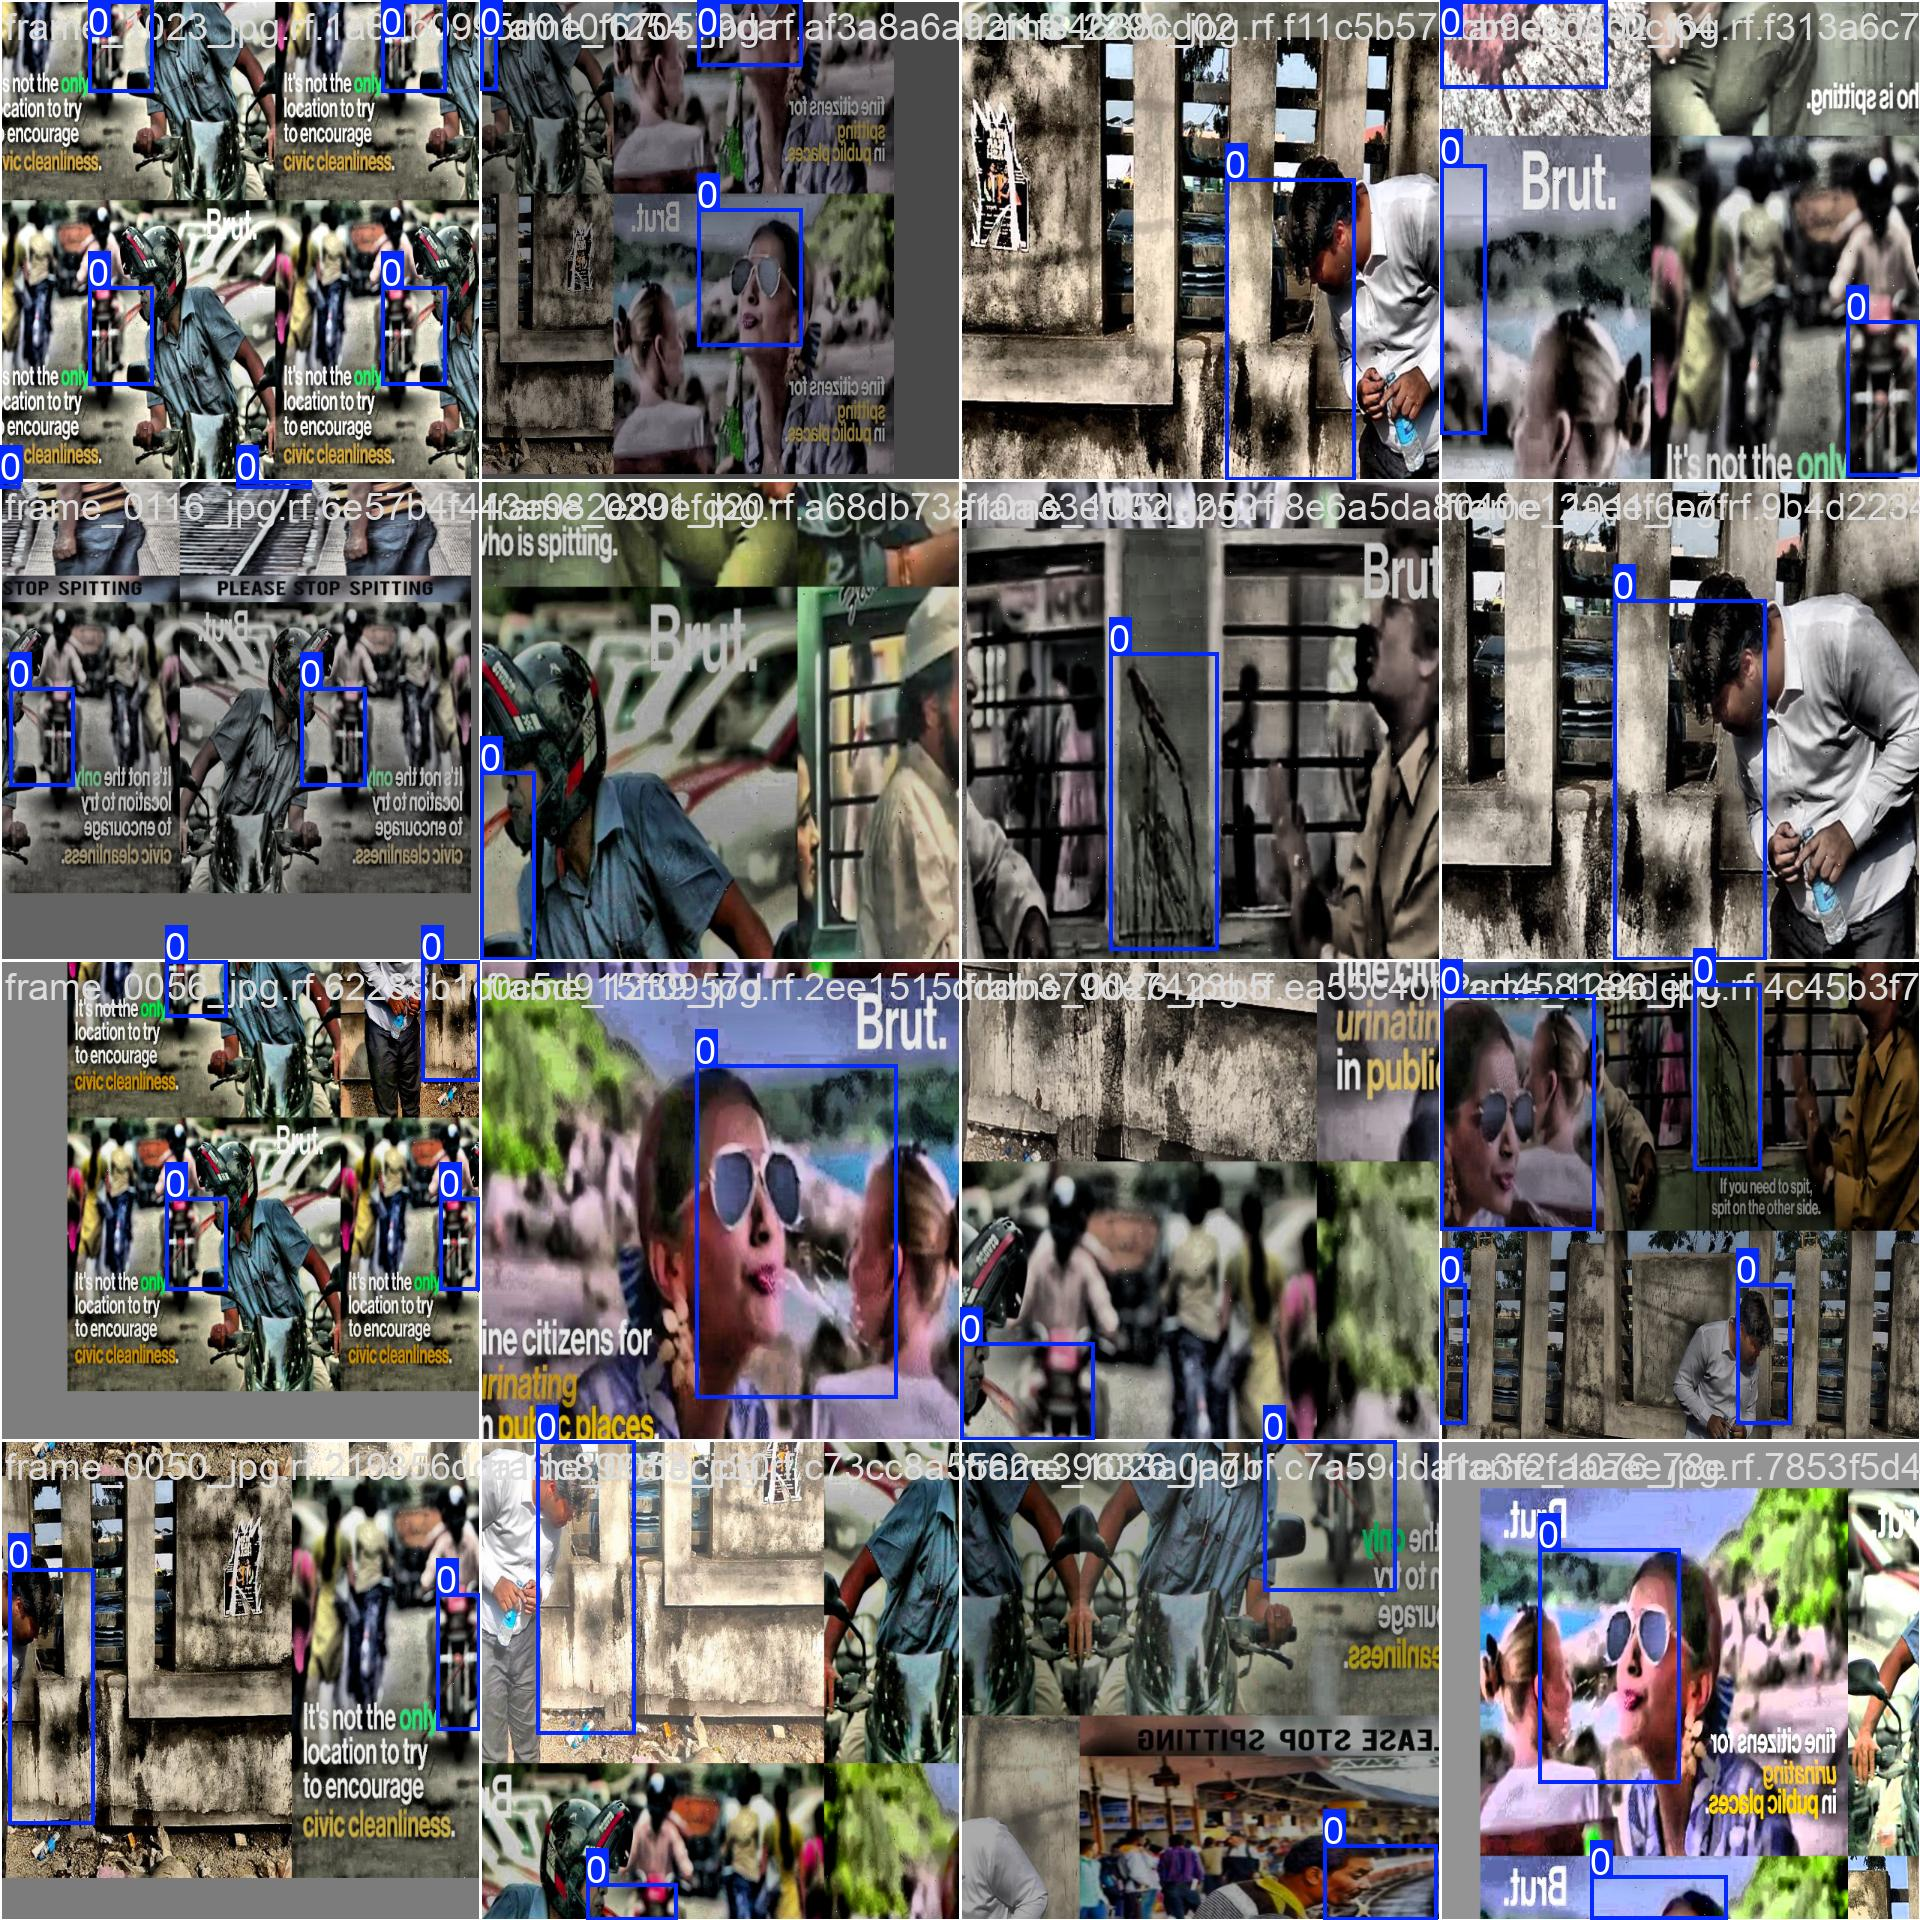

In [19]:
Image("/content/runs/detect/train3/train_batch0.jpg", width=600)

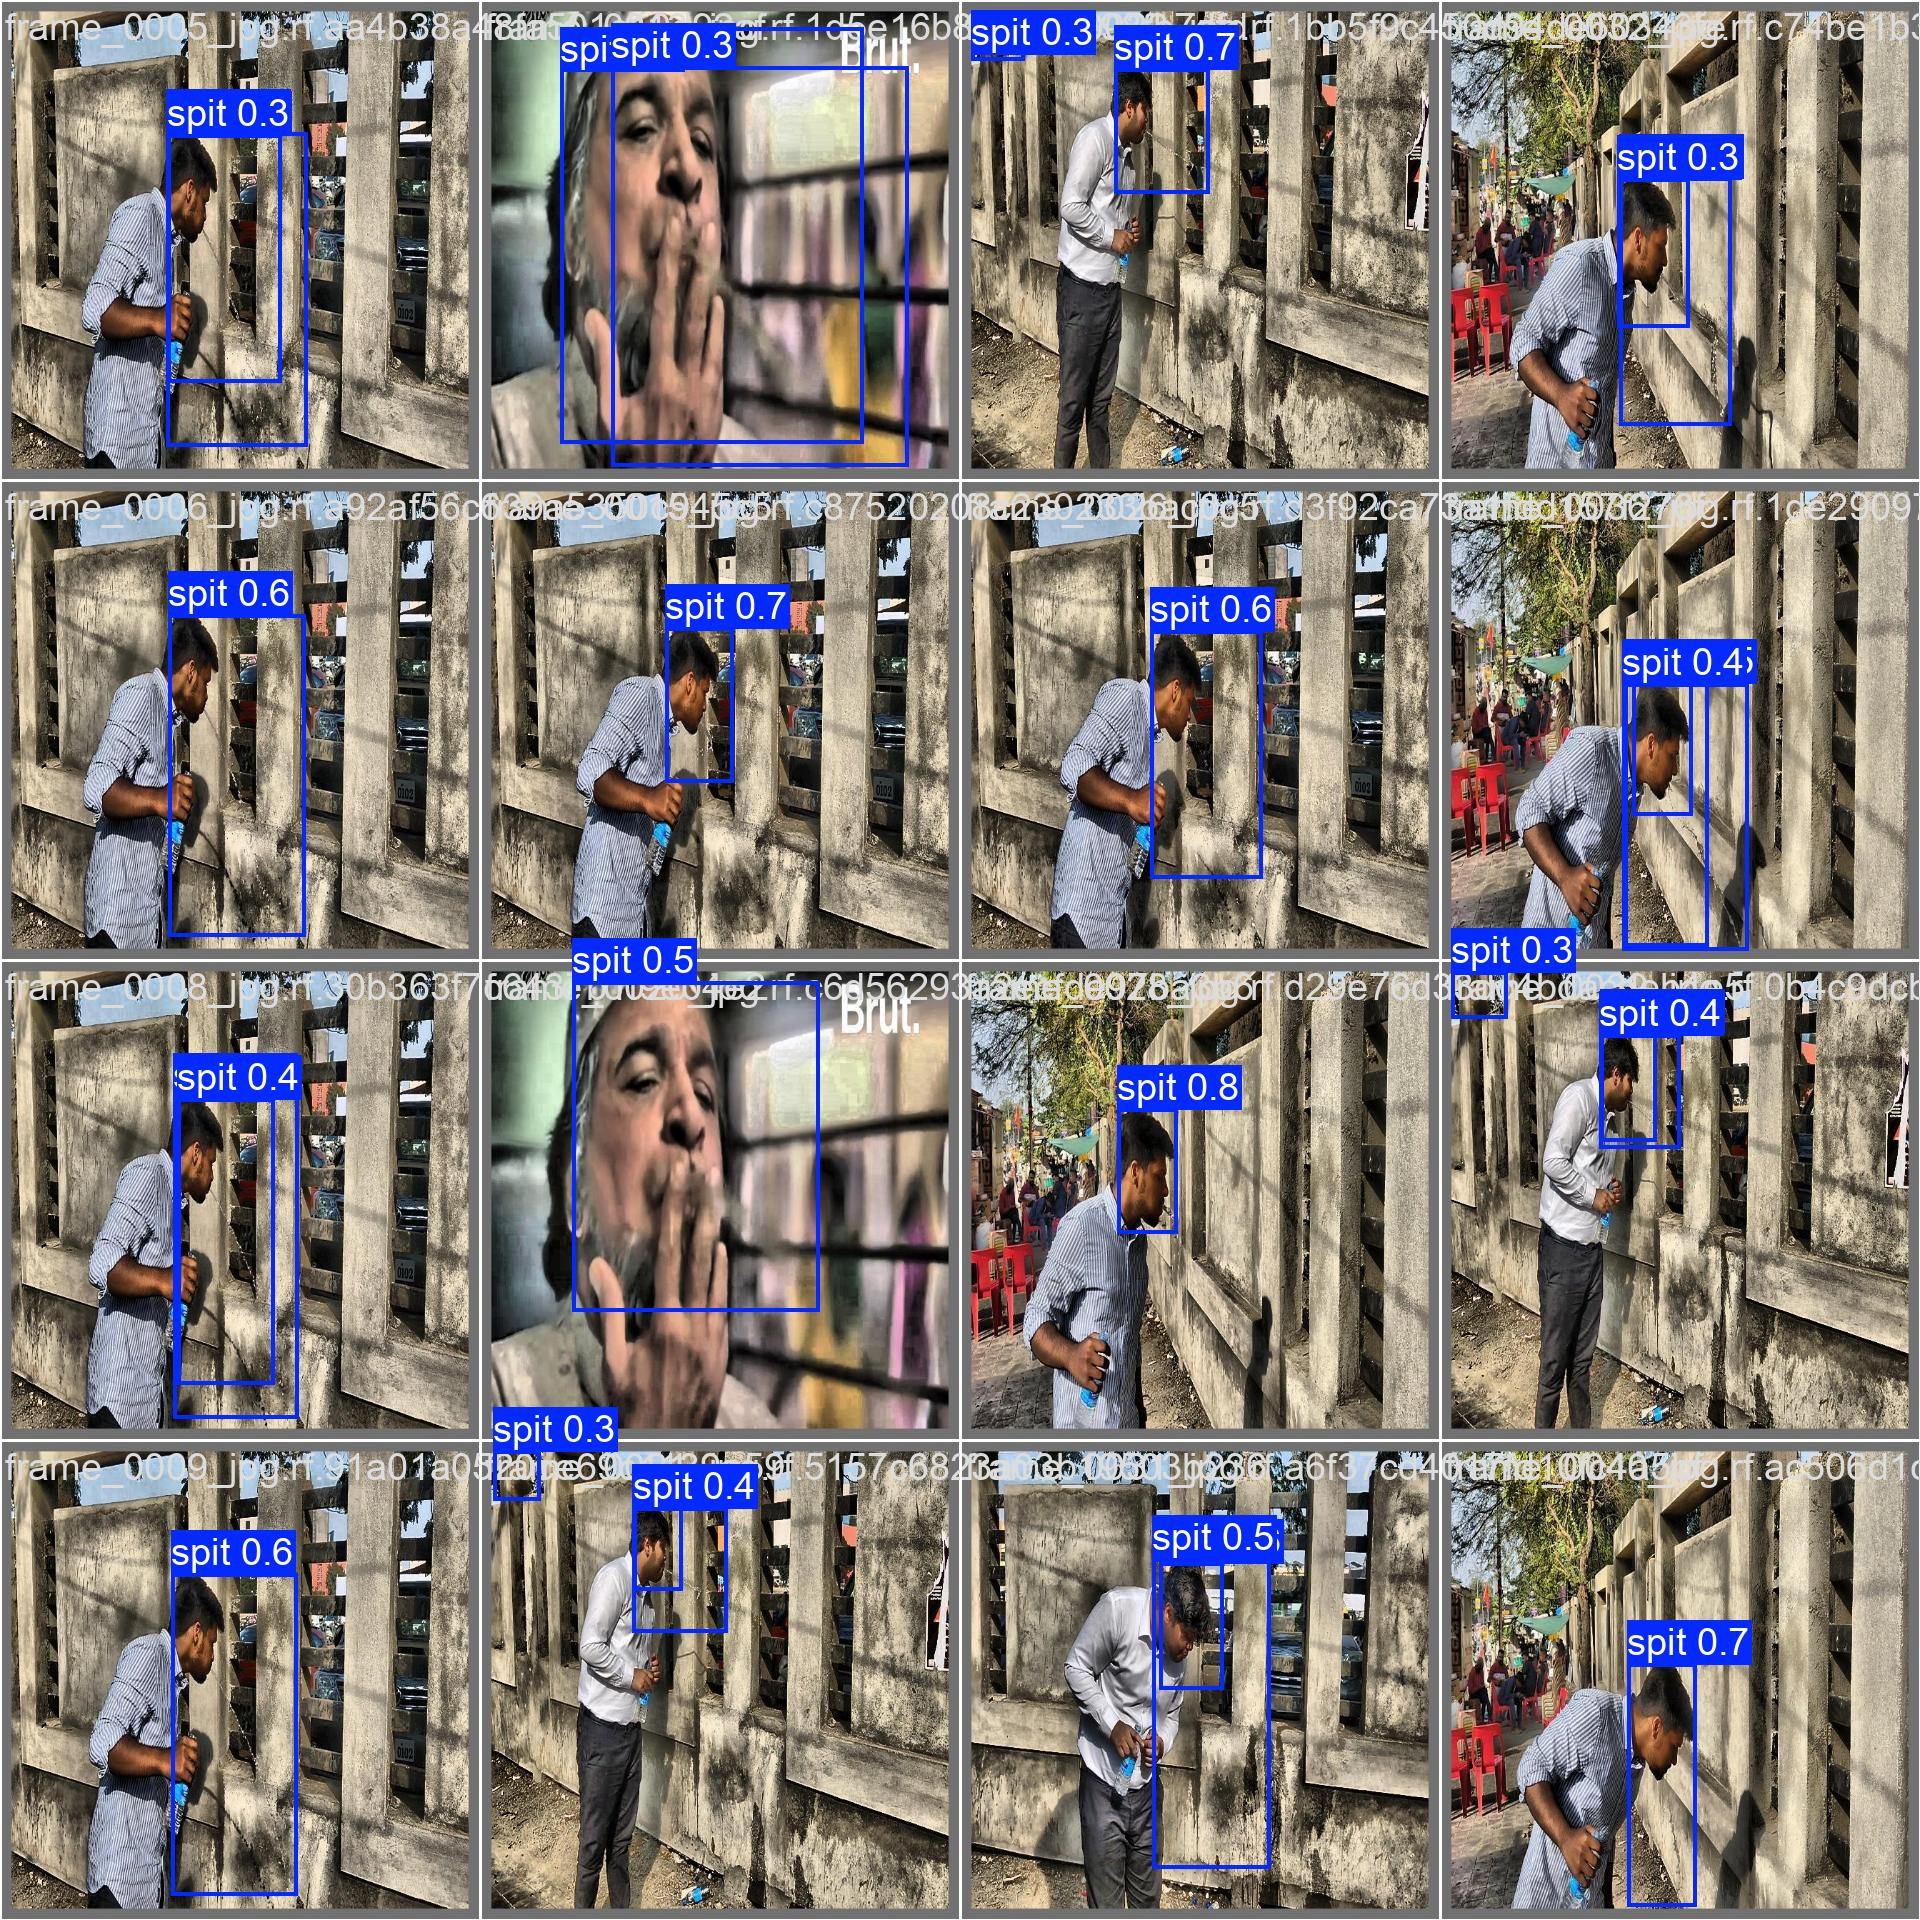

In [20]:
Image("/content/runs/detect/train3/val_batch0_pred.jpg", width=600)

In [21]:
!yolo task=detect mode=val model="/content/runs/detect/train3/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.141 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2223.5±793.3 MB/s, size: 91.6 KB)
val: Scanning /content/spit-detection-2/valid/labels.cache... 71 images, 0 backgrounds, 0 corrupt: 100% 71/71 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 60, len(boxes) = 71. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 5/5 [00:02<00:00,  2.09it/s]
                   all         71         71      0.826      0.732       0.85       0.44
Speed: 4.2ms preprocess, 12.1ms inference, 0.0ms loss, 5.1ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://

In [22]:
!yolo task=detect mode=predict model="/content/runs/detect/train3/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.141 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs

image 1/30 /content/spit-detection-2/test/images/frame_0000_jpg.rf.a3d09000b0c163b3b26f6bb1e74ff07b.jpg: 640x640 1 spit, 12.5ms
image 2/30 /content/spit-detection-2/test/images/frame_0018_jpg.rf.6b6172c3775f49da4c4357fd9dd147d1.jpg: 640x640 1 spit, 9.9ms
image 3/30 /content/spit-detection-2/test/images/frame_0018_jpg.rf.b095b6f8bba62562a4da13f31a467a91.jpg: 640x640 1 spit, 9.1ms
image 4/30 /content/spit-detection-2/test/images/frame_0049_jpg.rf.b7bff17d18b2a8a23d0049c196fef4a8.jpg: 640x640 2 spits, 8.8ms
image 5/30 /content/spit-detection-2/test/images/frame_0054_jpg.rf.d218d1e11c20067b2aa7e85554080e9e.jpg: 640x640 1 spit, 9.9ms
image 6/30 /content/spit-detection-2/test/images/frame_0175_jpg.rf.bdedcd1fd9c0b1435a2baf9716c4be0a.jpg: 640x640 2 spits, 11.5ms
image 7/30 /content/spit-detection-2/test/images/frame_0261_jpg.rf.

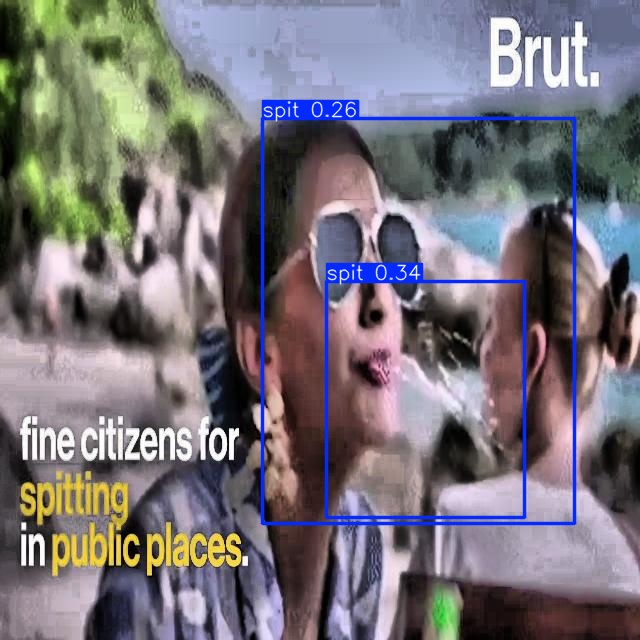

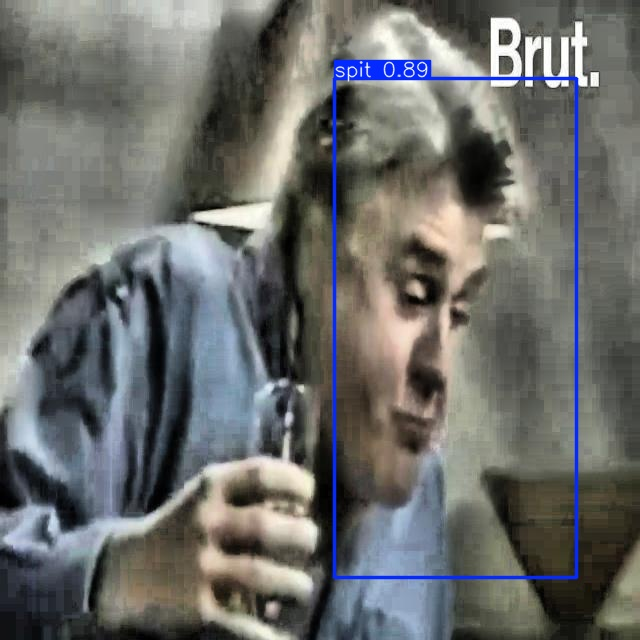

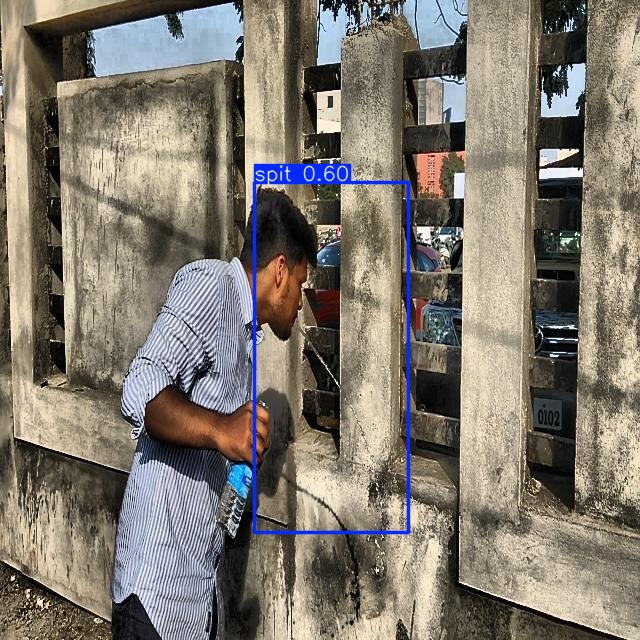

In [23]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")